For γ = 5/2, generate n = 1000 sets each of N = 10, 102, 103, 104, 105, and 106
samples, using Pk = ck−5/2 with k = 1, 2, 3, . . 

In [36]:
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt

In [21]:
def get_k_max(N:int, gamma:float):
    """
    z = [1 − F (z)]^(−1/(gamma - 1))
    return max
    """
    assert N > 0
    assert gamma > 1
    exponent = -1/(gamma-1)
    samples = [(1 - np.random.uniform())**exponent for _ in range(N)]
    return np.max(samples)

In [22]:
Ns = [10**i for i in range(1,7)]
n = 1000
gamma = 5/2

In [ ]:
# # run experiment
# k_maxes = {}
# for N in Ns:
#     k_maxes[N] = [get_k_max(N, gamma) for _ in range(1000)]

In [ ]:
# # write dict
# exp_file = open('experiment', 'wb')
# pickle.dump(k_maxes, exp_file)
# exp_file.close()

In [46]:
# open dict
exp_file = open('experiment', 'rb')
exp = pickle.load(exp_file)
exp_file.close()

# Plot experiment vs kmax for each N

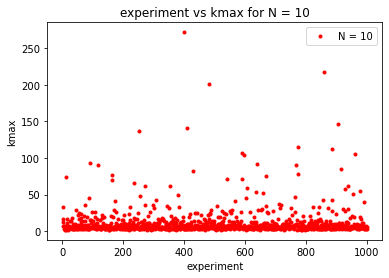

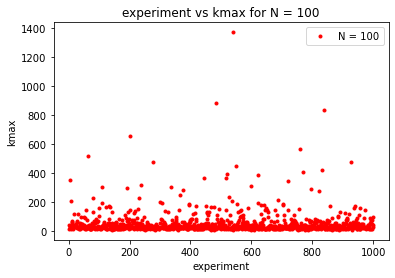

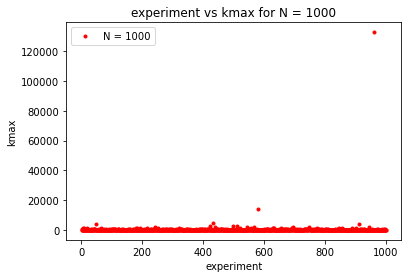

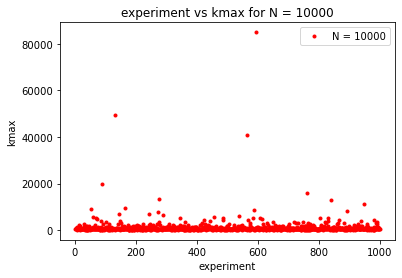

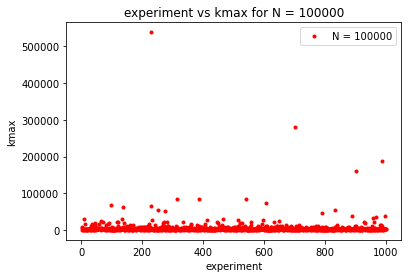

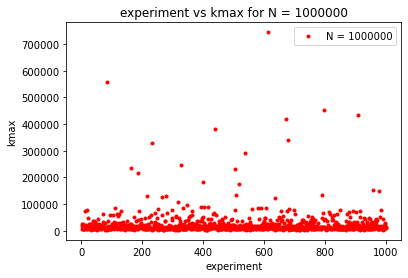

In [52]:
for N, kmax_list in exp.items():
    assert len(kmax_list) == n
    fig, ax = plt.subplots()
    experiments = list(range(1,1001))
    assert len(experiments) == n
    ax.plot(experiments, kmax_list, 'r.', label = "N = "+str(N))
    ax.legend()
    title_str = "experiment vs kmax for N = "+str(N)
    ax.set_xlabel("experiment")
    ax.set_ylabel("kmax")
    ax.set_title(title_str)
    plt.savefig("kmax_N_10_^"+str(int(np.log10(N)))+".png")
    plt.show()

# Log Plot N vs average(k_max) for each N

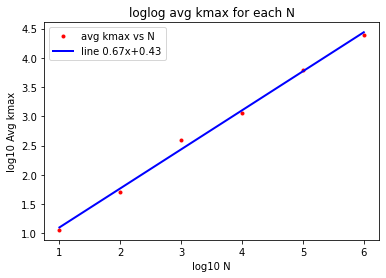

In [56]:
avg_kmax_N_dict = {N: np.mean(val) for N,val in exp.items()}
N_vals = list(avg_kmax_N_dict.keys())
avg_kmaxes = list(avg_kmax_N_dict.values())
fig, ax = plt.subplots()
ax.plot(np.log10(N_vals), np.log10(avg_kmaxes), 'r.', label = "avg kmax vs N")
# plot fitted line
# find line of best fit
a, b = np.polyfit(np.log10(N_vals),np.log10(avg_kmaxes), 1)
ax.plot(np.log10(N_vals), a*np.array(np.log10(N_vals))+b, color= 'b', linewidth=2.0, label = "line {}x+{}".format(round(a,2), round(b,2)))
ax.legend()
ax.set_xlabel("log10 N")
ax.set_ylabel("log10 Avg kmax")
ax.set_title("loglog avg kmax for each N")
plt.savefig("avg_kmax_vs_N_log_scale.png")
plt.show()

In [58]:
fit_params, res, _,_,_ = np.polyfit(np.log10(N_vals),np.log10(avg_kmaxes), 1, full=True)
print(fit_params)
print(res)

[0.66744548 0.43397794]
[0.03502586]


In [61]:
def get_exponent(gamma):
    return 1/(gamma-1)

print(get_exponent(5/2))

0.6666666666666666
